In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../benchmark/benchmark_simpd_trf_result.csv')

In [3]:
df

,Dataset,Run,Molecular_network_Fingeprint,Model_Fingeprint,Topological_Random_Forest_Accuracy,Topological_Random_Forest_Precision,Topological_Random_Forest_Recall,Topological_Random_Forest_Balanced_Accuracy,Topological_Random_Forest_F1_Score,Topological_Random_Forest_AUC_ROC,Random_Forest_Accuracy,Random_Forest_Precision,Random_Forest_Recall,Random_Forest_Balanced_Accuracy,Random_Forest_F1_Score,Random_Forest_AUC_ROC
0,CHEMBL1267245,0,rdkit,rdkit,0.556604,0.666667,0.321429,0.570714,0.433735,0.570714,0.556604,0.680000,0.303571,0.571786,0.419753,0.571786
1,CHEMBL1267245,1,rdkit,rdkit,0.566038,0.666667,0.357143,0.578571,0.465116,0.578571,0.575472,0.689655,0.357143,0.588571,0.470588,0.588571
2,CHEMBL1267245,2,rdkit,rdkit,0.594340,0.724138,0.375000,0.607500,0.494118,0.607500,0.584906,0.730769,0.339286,0.599643,0.463415,0.599643
3,CHEMBL1267247,0,rdkit,rdkit,0.623529,0.680000,0.414634,0.616408,0.515152,0.616408,0.600000,0.640000,0.390244,0.592849,0.484848,0.592849
4,CHEMBL1267247,1,rdkit,rdkit,0.588235,0.636364,0.341463,0.579823,0.444444,0.579823,0.623529,0.680000,0.414634,0.616408,0.515152,0.616408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,CHEMBL3889083,1,morgan3,morgan3,0.550000,0.625000,0.322581,0.557842,0.425532,0.557842,0.583333,0.714286,0.322581,0.592325,0.444444,0.592325
2684,CHEMBL3889083,2,morgan3,morgan3,0.566667,0.666667,0.322581,0.575083,0.434783,0.575083,0.583333,0.714286,0.322581,0.592325,0.444444,0.592325
2685,CHEMBL3889139,0,morgan3,morgan3,0.716667,0.736842,0.538462,0.695701,0.622222,0.695701,0.783333,0.882353,0.576923,0.759050,0.697674,0.759050
2686,CHEMBL3889139,1,morgan3,morgan3,0.716667,0.736842,0.538462,0.695701,0.622222,0.695701,0.800000,0.850000,0.653846,0.782805,0.739130,0.782805


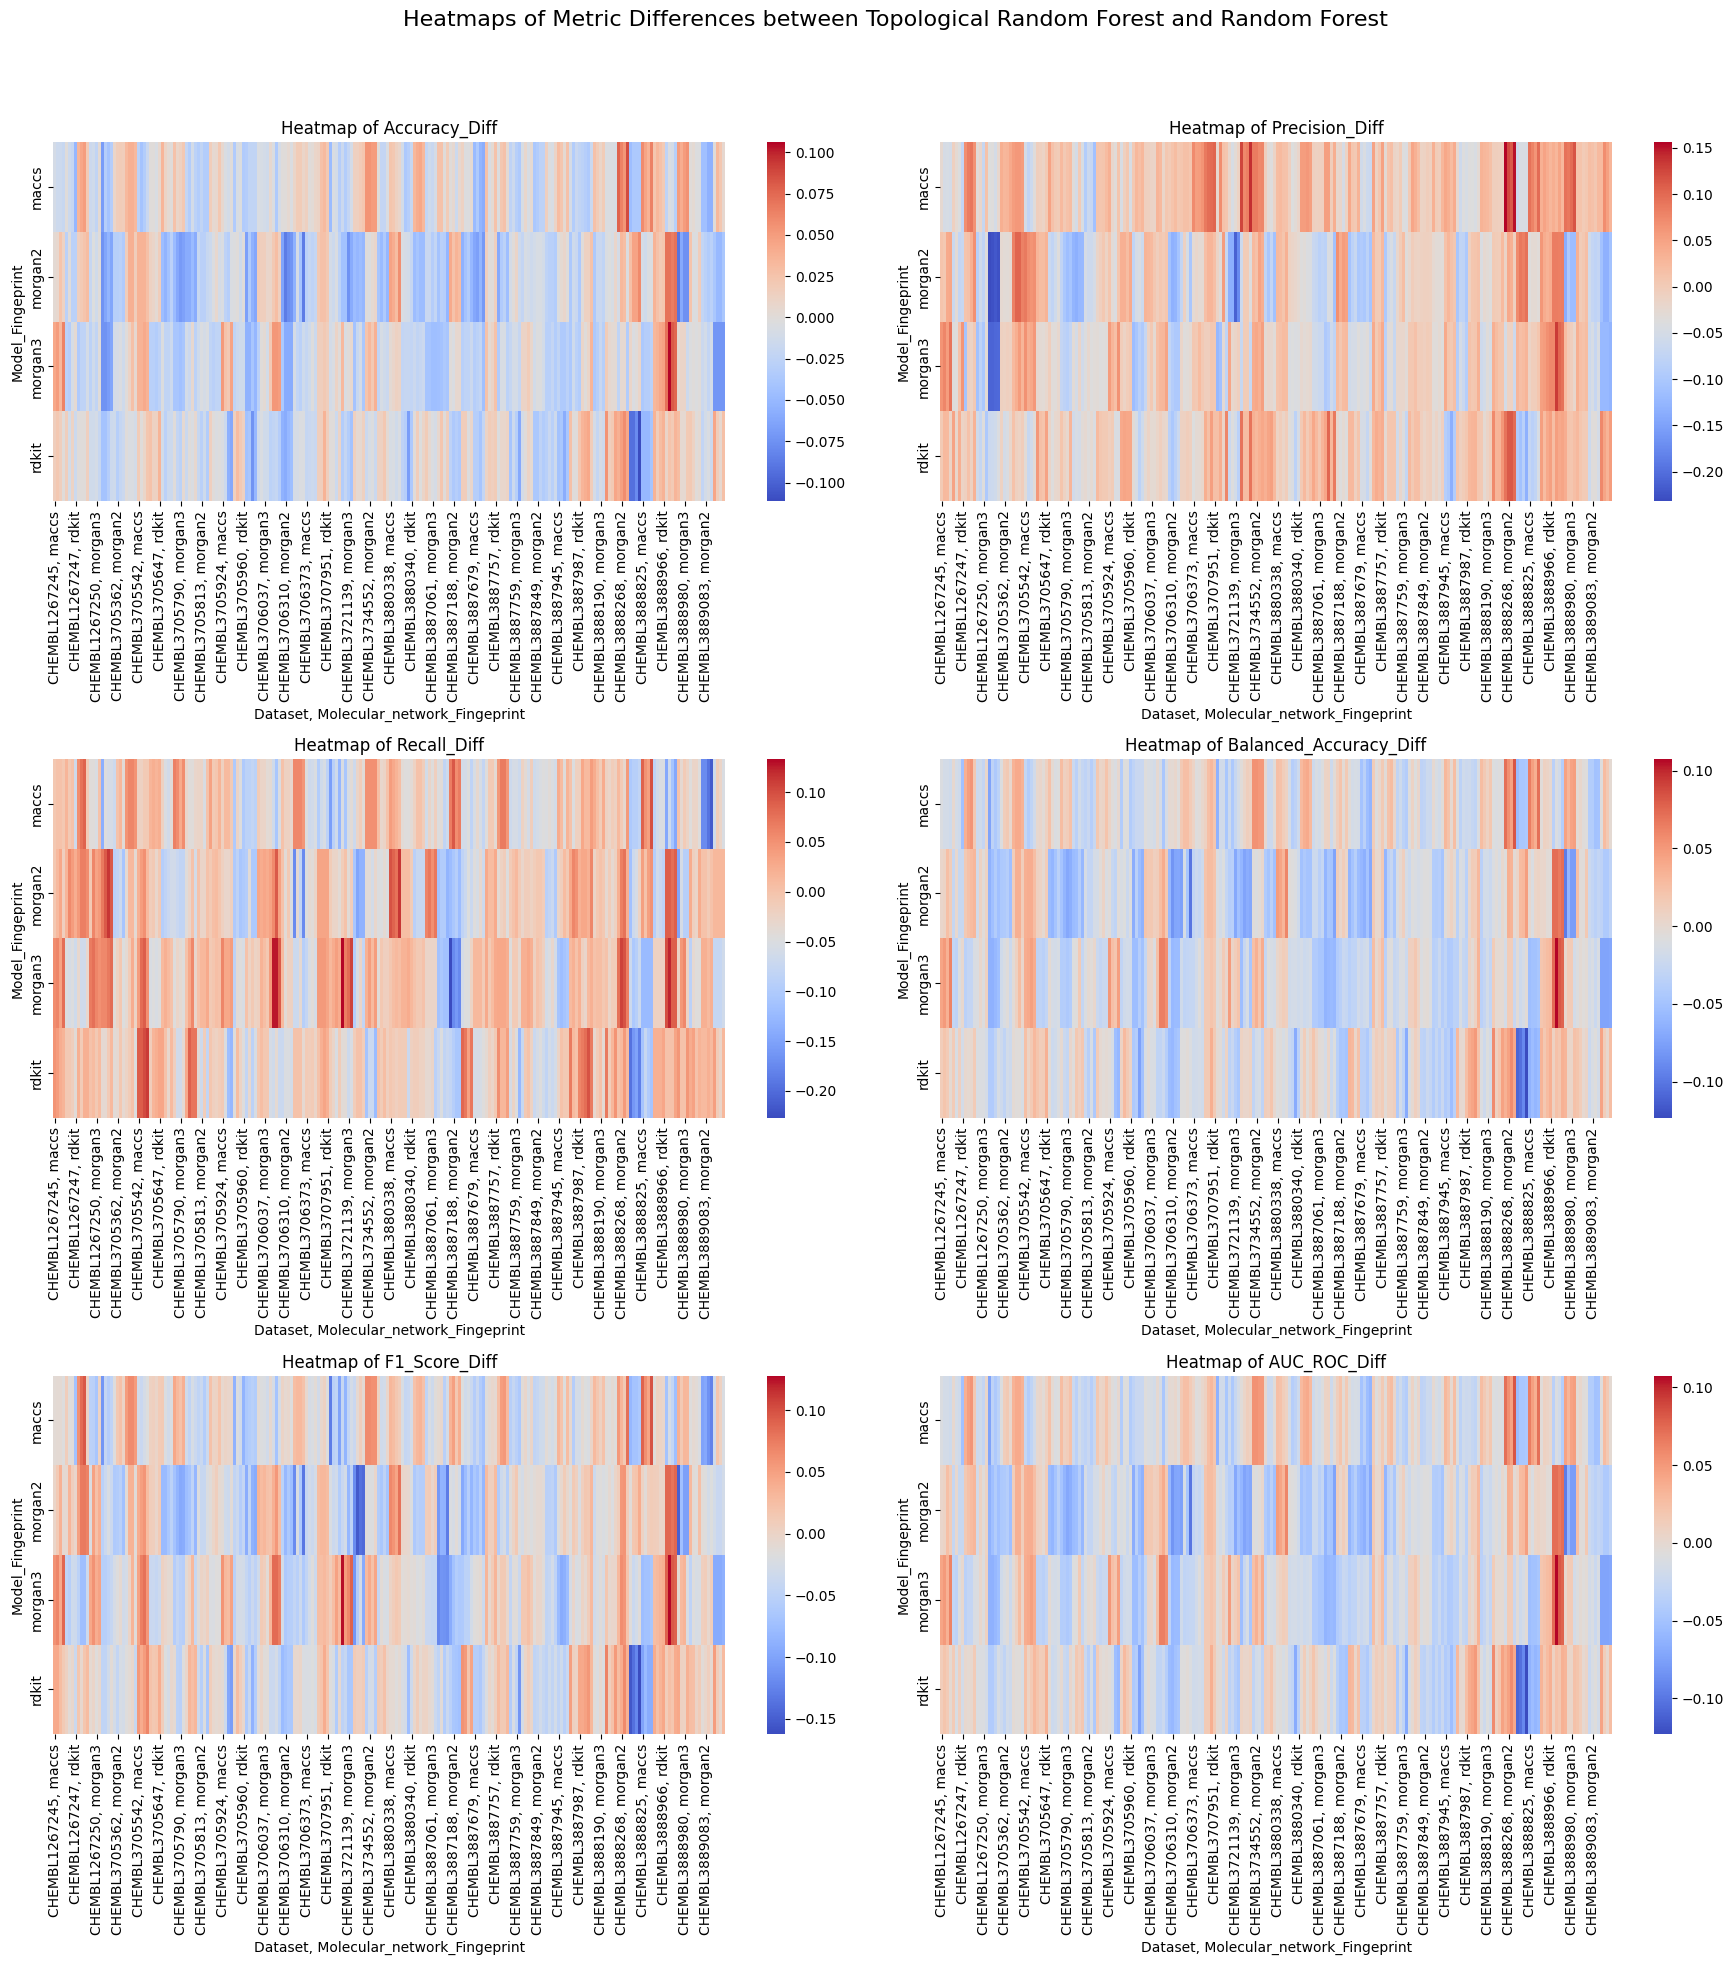

In [10]:
df['Accuracy_Diff'] = df['Topological_Random_Forest_Accuracy'] - df['Random_Forest_Accuracy']
df['Precision_Diff'] = df['Topological_Random_Forest_Precision'] - df['Random_Forest_Precision']
df['Recall_Diff'] = df['Topological_Random_Forest_Recall'] - df['Random_Forest_Recall']
df['Balanced_Accuracy_Diff'] = df['Topological_Random_Forest_Balanced_Accuracy'] - df['Random_Forest_Balanced_Accuracy']
df['F1_Score_Diff'] = df['Topological_Random_Forest_F1_Score'] - df['Random_Forest_F1_Score']
df['AUC_ROC_Diff'] = df['Topological_Random_Forest_AUC_ROC'] - df['Random_Forest_AUC_ROC']

# List of metric differences to plot
metrics = ['Accuracy_Diff', 'Precision_Diff', 'Recall_Diff', 'Balanced_Accuracy_Diff', 'F1_Score_Diff', 'AUC_ROC_Diff']

# Sort the DataFrame by Percent_Activity_Cliff_test
df_sorted = df#.sort_values(by='Percent_Activity_Cliff_test')

# Create a combined column for sorting
df_sorted['Combined'] = df_sorted['Dataset'] + ', ' + df_sorted['Molecular_network_Fingeprint']

# Group the data by the relevant columns and calculate mean differences
grouped = df_sorted.groupby(['Dataset','Molecular_network_Fingeprint', 'Model_Fingeprint', 'Combined']).mean().reset_index()

# Create a single figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 20))
fig.suptitle('Heatmaps of Metric Differences between Topological Random Forest and Random Forest', fontsize=16)

# Get the sorted combined column order
# sorted_combined_order = grouped.sort_values(by='Percent_Activity_Cliff_test')['Combined'].unique()

# Iterate over metrics and axes
for i, metric in enumerate(metrics):
    # Determine row and column index
    row = i // 2
    col = i % 2
    
    # Create a pivot table for the heatmap, following the sorted order
    pivot_table = grouped.pivot_table(index='Model_Fingeprint', columns='Combined', values=metric)
    # pivot_table = pivot_table[sorted_combined_order]  # Ensure columns are sorted

    # Plot the heatmap on the corresponding subplot
    sns.heatmap(pivot_table, annot=False, cmap='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f'Heatmap of {metric}')
    axes[row, col].set_xlabel('Dataset, Molecular_network_Fingeprint')
    axes[row, col].set_ylabel('Model_Fingeprint')

# Adjust layout for better viewing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [11]:
df = pd.read_csv('../benchmark/benchmark_simpd_trf_result.csv')
df['Accuracy_Diff'] = df['Topological_Random_Forest_Accuracy'] - df['Random_Forest_Accuracy']
df['Precision_Diff'] = df['Topological_Random_Forest_Precision'] - df['Random_Forest_Precision']
df['Recall_Diff'] = df['Topological_Random_Forest_Recall'] - df['Random_Forest_Recall']
df['Balanced_Accuracy_Diff'] = df['Topological_Random_Forest_Balanced_Accuracy'] - df['Random_Forest_Balanced_Accuracy']
df['F1_Score_Diff'] = df['Topological_Random_Forest_F1_Score'] - df['Random_Forest_F1_Score']
df['AUC_ROC_Diff'] = df['Topological_Random_Forest_AUC_ROC'] - df['Random_Forest_AUC_ROC']


In [19]:
from scipy.stats import ttest_rel

# List of metrics differences
metrics_diff = ['Accuracy_Diff', 'Precision_Diff', 'Recall_Diff', 'Balanced_Accuracy_Diff', 'F1_Score_Diff', 'AUC_ROC_Diff']

# Dictionary to store t-test results
ttest_results = {}

# Perform paired t-tests for each metric
for metric in metrics_diff:
    t_stat, p_value = ttest_rel(df[f'Topological_Random_Forest_{metric[:-5]}'], df[f'Random_Forest_{metric[:-5]}'])
    ttest_results[metric[:-5]] = {'t_stat': t_stat, 'p_value': p_value}

# Create a DataFrame to display the results
ttest_results_df = pd.DataFrame(ttest_results).T
ttest_results_df['Significant'] = ttest_results_df['p_value'] < 0.05

print(ttest_results_df)

                      t_stat       p_value  Significant
Accuracy          -10.982347  1.767877e-27         True
Precision          -8.038312  1.350860e-15         True
Recall            -13.639334  5.249940e-41         True
Balanced_Accuracy -13.279253  5.043522e-39         True
F1_Score          -13.301449  3.818123e-39         True
AUC_ROC           -13.279253  5.043522e-39         True


In [20]:
from scipy.stats import wilcoxon

# Dictionary to store Wilcoxon test results
wilcoxon_results = {}

# Perform Wilcoxon signed-rank tests for each metric
for metric in metrics_diff:
    stat, p_value = wilcoxon(df[f'Topological_Random_Forest_{metric[:-5]}'], df[f'Random_Forest_{metric[:-5]}'])
    wilcoxon_results[metric[:-5]] = {'stat': stat, 'p_value': p_value}

# Create a DataFrame to display the results
wilcoxon_results_df = pd.DataFrame(wilcoxon_results).T
wilcoxon_results_df['Significant'] = wilcoxon_results_df['p_value'] < 0.05

print("Wilcoxon Signed-Rank Test Results")
print(wilcoxon_results_df)


Wilcoxon Signed-Rank Test Results
                        stat       p_value  Significant
Accuracy           1007723.5  8.873816e-28         True
Precision          1374552.5  1.533166e-12         True
Recall              862458.0  1.419943e-38         True
Balanced_Accuracy  1179571.5  3.139762e-38         True
F1_Score           1186021.0  3.594109e-38         True
AUC_ROC            1181510.0  3.057309e-38         True


In [21]:
from statsmodels.stats.descriptivestats import sign_test

# Dictionary to store Sign test results
sign_test_results = {}

# Perform Sign tests for each metric
for metric in metrics_diff:
    stat, p_value = sign_test(df[f'Topological_Random_Forest_{metric[:-5]}'], df[f'Random_Forest_{metric[:-5]}'])
    sign_test_results[metric[:-5]] = {'stat': stat, 'p_value': p_value}

# Create a DataFrame to display the results
sign_test_results_df = pd.DataFrame(sign_test_results).T
sign_test_results_df['Significant'] = sign_test_results_df['p_value'] < 0.05

print("Sign Test Results")
print(sign_test_results_df)


Sign Test Results
                    stat       p_value  Significant
Accuracy          -215.5  4.505282e-19         True
Precision         -103.0  5.041252e-05         True
Recall            -267.0  1.310944e-29         True
Balanced_Accuracy -260.0  1.254155e-24         True
F1_Score          -276.0  1.637511e-27         True
AUC_ROC           -259.0  1.969711e-24         True


In [22]:
from mlxtend.evaluate import permutation_test

# Dictionary to store Permutation test results
permutation_test_results = {}

# Perform Permutation tests for each metric
for metric in metrics_diff:
    p_value = permutation_test(df[f'Random_Forest_{metric[:-5]}'], df[f'Random_Forest_{metric[:-5]}'], method='approximate', num_rounds=10000, seed=42)
    permutation_test_results[metric[:-5]] = {'p_value': p_value}

# Create a DataFrame to display the results
permutation_test_results_df = pd.DataFrame(permutation_test_results).T
permutation_test_results_df['Significant'] = permutation_test_results_df['p_value'] < 0.05

print("Permutation Test Results")
print(permutation_test_results_df)


Permutation Test Results
                   p_value  Significant
Accuracy               1.0        False
Precision              1.0        False
Recall                 1.0        False
Balanced_Accuracy      1.0        False
F1_Score               1.0        False
AUC_ROC                1.0        False


In [23]:
# Combine results from all tests
all_tests_df = pd.concat([ttest_results_df, wilcoxon_results_df, sign_test_results_df, permutation_test_results_df], 
                         keys=['t-test', 'Wilcoxon', 'Sign Test', 'Permutation Test'], 
                         names=['Test', 'Metric'])
print("Summary of All Test Results")
all_tests_df


Summary of All Test Results


t_stat       p_value  Significant  \
Test             Metric                                                    
t-test           Accuracy          -10.982347  1.767877e-27         True   
                 Precision          -8.038312  1.350860e-15         True   
                 Recall            -13.639334  5.249940e-41         True   
                 Balanced_Accuracy -13.279253  5.043522e-39         True   
                 F1_Score          -13.301449  3.818123e-39         True   
                 AUC_ROC           -13.279253  5.043522e-39         True   
Wilcoxon         Accuracy                 NaN  8.873816e-28         True   
                 Precision                NaN  1.533166e-12         True   
                 Recall                   NaN  1.419943e-38         True   
                 Balanced_Accuracy        NaN  3.139762e-38         True   
                 F1_Score                 NaN  3.594109e-38         True   
                 AUC_ROC                  NaN  3.057309e-38         True   
Sign Test        Accuracy                 NaN  4.505282e-19         True   
                 Precision                NaN  5.041252e-05         True   
                 Recall                   NaN  1.310944e-29         True   
                 Balanced_Accuracy        NaN  1.254155e-24         True   
                 F1_Score                 NaN  1.637511e-27         True   
                 AUC_ROC                  NaN  1.969711e-24         True   
Permutation Test Accuracy                 NaN  1.000000e+00        False   
                 Precision                NaN  1.000000e+00        False   
                 Recall                   NaN  1.000000e+00        False   
                 Balanced_Accuracy        NaN  1.000000e+00        False   
                 F1_Score                 NaN  1.000000e+00        False   
                 AUC_ROC                  NaN  1.000000e+00        False   

                                         stat  
Test             Metric                        
t-test           Accuracy                 NaN  
                 Precision                NaN  
                 Recall                   NaN  
                 Balanced_Accuracy        NaN  
                 F1_Score                 NaN  
                 AUC_ROC                  NaN  
Wilcoxon         Accuracy           1007723.5  
                 Precision          1374552.5  
                 Recall              862458.0  
                 Balanced_Accuracy  1179571.5  
                 F1_Score           1186021.0  
                 AUC_ROC            1181510.0  
Sign Test        Accuracy              -215.5  
                 Precision             -103.0  
                 Recall                -267.0  
                 Balanced_Accuracy     -260.0  
                 F1_Score              -276.0  
                 AUC_ROC               -259.0  
Permutation Test Accuracy                 NaN  
                 Precision                NaN  
                 Recall                   NaN  
                 Balanced_Accuracy        NaN  
                 F1_Score                 NaN  
                 AUC_ROC                  NaN

In [24]:
from scipy.stats import  shapiro

# Calculate differences in metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'Balanced_Accuracy', 'F1_Score', 'AUC_ROC']
differences = {metric: df[f'Topological_Random_Forest_{metric}'] - df[f'Random_Forest_{metric}'] for metric in metrics}

# Check normality of differences using Shapiro-Wilk test
normality_results = {metric: shapiro(differences[metric]) for metric in metrics}
print("Shapiro-Wilk Normality Test Results")
for metric, result in normality_results.items():
    print(f"{metric}: W-statistic={result.statistic}, p-value={result.pvalue}")

Shapiro-Wilk Normality Test Results
Accuracy: W-statistic=0.9959029936336071, p-value=9.978500009503855e-07
Precision: W-statistic=0.9874124725467854, p-value=1.0910105567272585e-14
Recall: W-statistic=0.9889568588008244, p-value=1.4080029131626695e-13
Balanced_Accuracy: W-statistic=0.9966403474460482, p-value=1.0989802143987734e-05
F1_Score: W-statistic=0.9901466608827, p-value=1.1928799928134872e-12
AUC_ROC: W-statistic=0.9966403474460489, p-value=1.098980214401558e-05


In [26]:
# Calculate differences in metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'Balanced_Accuracy', 'F1_Score', 'AUC_ROC']
differences = {metric: df[f'Topological_Random_Forest_{metric}'] - df[f'Random_Forest_{metric}'] for metric in metrics}

# Perform Wilcoxon signed-rank tests
wilcoxon_results = {metric: wilcoxon(df[f'Topological_Random_Forest_{metric}'], df[f'Random_Forest_{metric}']) for metric in metrics}

# Calculate Cohen's d for each metric
def cohen_d(x, y):
    n = len(x)
    d = np.mean(x - y) / np.std(x - y, ddof=1)
    return d

cohen_d_results = {metric: cohen_d(df[f'Topological_Random_Forest_{metric}'], df[f'Random_Forest_{metric}']) for metric in metrics}

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Wilcoxon_stat': {metric: result.statistic for metric, result in wilcoxon_results.items()},
    'p-value': {metric: result.pvalue for metric, result in wilcoxon_results.items()},
    'Cohen_d': cohen_d_results
})
results['Significant'] = results['p-value'] < 0.05

print("\nWilcoxon Signed-Rank Test and Effect Size Results")
results


Wilcoxon Signed-Rank Test and Effect Size Results


,Wilcoxon_stat,p-value,Cohen_d,Significant
Accuracy,1007723.5,8.873816e-28,-0.211827,True
Precision,1374552.5,1.533166e-12,-0.155042,True
Recall,862458.0,1.419943e-38,-0.263074,True
Balanced_Accuracy,1179571.5,3.139762e-38,-0.256129,True
F1_Score,1186021.0,3.594109e-38,-0.256557,True
AUC_ROC,1181510.0,3.057309e-38,-0.256129,True


/var/folders/nj/v2qpgqmx5v95v_p1dzfj62yr0000gn/T/ipykernel_705/517567420.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=45)


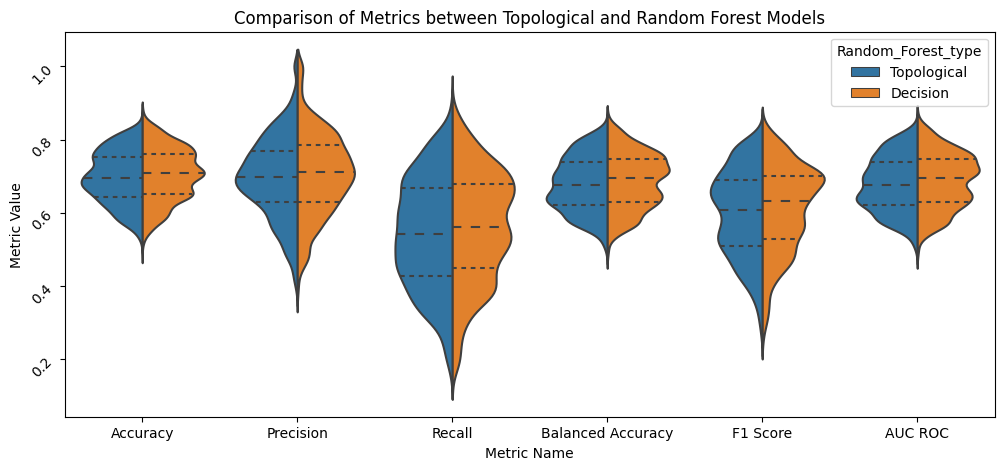

In [30]:
# Define metrics to melt
metrics = [
    "Topological_Random_Forest_Accuracy", "Random_Forest_Accuracy",
    "Topological_Random_Forest_Precision", "Random_Forest_Precision",
    "Topological_Random_Forest_Recall", "Random_Forest_Recall",
    "Topological_Random_Forest_Balanced_Accuracy", "Random_Forest_Balanced_Accuracy",
    "Topological_Random_Forest_F1_Score", "Random_Forest_F1_Score",
    "Topological_Random_Forest_AUC_ROC", "Random_Forest_AUC_ROC"
]

# Melt the DataFrame to create a DataFrame with metric types and values
df_melted = df.melt(id_vars=['Dataset', 'Molecular_network_Fingeprint', 'Model_Fingeprint'],
                    value_vars=metrics,
                    var_name='metric_type',
                    value_name='value')

# Extract the decision tree type (Topological or Decision) and metric name from the metric type
df_melted['Random_Forest_type'] = df_melted['metric_type'].apply(lambda x: 'Topological' if 'Topological' in x else 'Decision')
df_melted['metric_name'] = df_melted['metric_type'].apply(lambda x: x.replace("Topological_Random_Forest_", "").replace("Random_Forest_", "").replace("_", " "))

# Set up the plot
plt.figure(figsize=(12, 5))

# Create a violin plot comparing the distributions of each metric for "Topological Decision Tree" and "Decision Tree"
ax = sns.violinplot(data=df_melted, x='metric_name', y='value', hue='Random_Forest_type', split=True, inner='quartile')

# Set y-tick labels rotation (optional, you can adjust the angle as needed)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

# Set x-tick labels to remove underscores and rotate for readability
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set title and labels
plt.title('Comparison of Metrics between Topological and Random Forest Models')
plt.xlabel('Metric Name')
plt.ylabel('Metric Value')

# Show the plot
plt.show()

# Visualising Topological impurity reduction in practice

In [22]:
import os
from joblib import load
os.chdir('../benchmark')

In [23]:
clf = load("./clf.joblib")

In [24]:
clf

{'split_feature': 277,
 'split_value': 0,
 'left': {'split_feature': 1295,
  'split_value': 0,
  'left': {'split_feature': 327,
   'split_value': 0,
   'left': {'split_feature': 295,
    'split_value': 0,
    'left': {'split_feature': 79,
     'split_value': 0,
     'left': {'split_feature': 314,
      'split_value': 0,
      'left': {'split_feature': 80,
       'split_value': 0,
       'left': {'leaf': True,
        'class': 0,
        'topological_impurity': 0.0,
        'P_active': 0.0},
       'right': {'leaf': True,
        'class': 1,
        'topological_impurity': 0.0,
        'P_active': 1.0},
       'topological_impurity': 0.1875,
       'P_active': 0.75},
      'right': {'split_feature': 752,
       'split_value': 0,
       'left': {'split_feature': 33,
        'split_value': 0,
        'left': {'split_feature': 241,
         'split_value': 0,
         'left': {'split_feature': 204,
          'split_value': 0,
          'left': {'leaf': True,
           'class': 0,
         

# Draw the Decision Tree as Image

In [25]:
import pydot

def plot_binary_Random_Forest(tree_dict):
    def add_node_and_edges(graph, node, node_id):
        # Create the current node in the graph
        if 'leaf' in node:
            # Leaf node
            label = f"class: {node['class']}\nimpurity: {node['topological_impurity']:.2f}\nP_active: {node['P_active']}"
            graph.add_node(pydot.Node(node_id, label=label, shape='ellipse', style='filled', fillcolor='lightblue'))
        else:
            # Decision node
            label = f"split_feature: {node['split_feature']}\nsplit_value: {node['split_value']}\nP_active: {node['P_active']}\nimpurity: {node['topological_impurity']:.2f}"
            graph.add_node(pydot.Node(node_id, label=label, shape='box'))

            # Recur on left and right children
            left_node_id = f"{node_id}_left"
            right_node_id = f"{node_id}_right"
            
            # Add left and right child nodes
            add_node_and_edges(graph, node['left'], left_node_id)
            add_node_and_edges(graph, node['right'], right_node_id)
            
            # Add edges from current node to left and right children
            graph.add_edge(pydot.Edge(node_id, left_node_id, label='left'))
            graph.add_edge(pydot.Edge(node_id, right_node_id, label='right'))
    
    # Create a graph
    graph = pydot.Dot(graph_type='digraph')

    # Start adding nodes and edges from the root
    add_node_and_edges(graph, tree_dict, "root")
    
    # Display the graph
    graph.write_png('binary_Random_Forest.png')
    print("Decision tree plotted and saved as 'binary_Random_Forest.png'.")

# Plot the binary decision tree
plot_binary_Random_Forest(clf)

Decision tree plotted and saved as 'binary_decision_tree.png'.
